Name: Sree Lakshmi Addepalli


Email: sla410@nyu.edu

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy

In [0]:
input_size  = 28*28   # images are 28x28 pixels
output_size = 10      # there are 10 classes

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=1000, shuffle=True)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

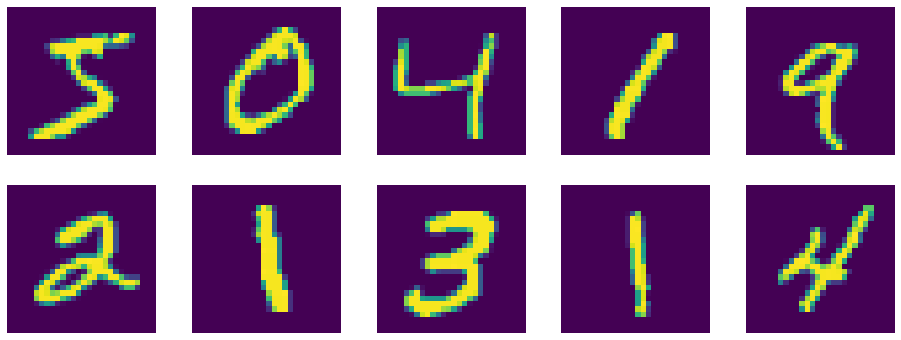

In [0]:
# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off');

In [0]:
# function to count number of parameters
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        print(p.size())
        np += p.nelement()
    return np

## List of activation functions used:

- Tanh
- ReLu
- Sigmoid


## Comparison of various activation functions on the following Neural Network Architectures:

- MultiLayerPerceptron / FeedForward Neural Network
- Convolution Neural Network
- Recurrent Neural Network
- Autoencoders

In [0]:
## Defining the classes for multilayer perceptron with Relu activation:

class FC2LayerRelu(nn.Module):
    def __init__(self, input_size, n_hidden, output_size):
        super(FC2LayerRelu, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [0]:
## Defining the classes for multilayer perceptron with Tanh activation:

class FC2LayerTanh(nn.Module):
    def __init__(self, input_size, n_hidden, output_size):
        super(FC2LayerTanh, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden), 
            nn.Tanh(), 
            nn.Linear(n_hidden, n_hidden), 
            nn.Tanh(), 
            nn.Linear(n_hidden, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [0]:
## Defining the classes for multilayer perceptron with Sigmoid activation:

class FC2LayerSigmoid(nn.Module):
    def __init__(self, input_size, n_hidden, output_size):
        super(FC2LayerSigmoid, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, n_hidden), 
            nn.Sigmoid(), 
            nn.Linear(n_hidden, n_hidden), 
            nn.Sigmoid(), 
            nn.Linear(n_hidden, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [0]:
## Defining the classes for Convolutional Neural Network with Relu activation function:

class CNNRelu(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNNRelu, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.fc1 = nn.Linear(n_feature*4*4, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [0]:
## Defining the classes for Convolutional Neural Network with Tanh activation function:

class CNNTanh(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNNTanh, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.fc1 = nn.Linear(n_feature*4*4, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.tanh(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.tanh(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*4*4)
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [0]:
## Defining the classes for Convolutional Neural Network with sigmoid activation function:

class CNNSigmoid(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNNSigmoid, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.fc1 = nn.Linear(n_feature*4*4, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.sigmoid(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.sigmoid(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*4*4)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [0]:
## Defining the classes for Autoencoders with Tanh activation function:

class autoencoderTanh(nn.Module):
    def __init__(self):
        super(autoencoderTanh, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(), nn.Linear(64, 12), nn.Tanh(), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
## Defining the classes for Autoencoders with Relu activation function:

class autoencoderReLu(nn.Module):
    def __init__(self):
        super(autoencoderReLu, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.ReLU())

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
## Defining the classes for Autoencoders with Sigmoid activation function:

class autoencoderSigmoid(nn.Module):
    def __init__(self):
        super(autoencoderSigmoid, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(), nn.Linear(64, 12), nn.Sigmoid(), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Sigmoid(),
            nn.Linear(12, 64),
            nn.Sigmoid(),
            nn.Linear(64, 128),
            nn.Sigmoid(), nn.Linear(128, 28 * 28), nn.Sigmoid())

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
# Define Train and Test module for CNN and MLP

accuracy_list = []

def train(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        #print(len(data))
        #print(len(target))
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        #print(data.shape)

        optimizer.zero_grad()
        output = model(data)
        #print("%%%")
        #print(output.shape)
        #print(target.shape)
        #print("%%%")
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [0]:
n_hidden = 8 # number of hidden units

# Training MLP with Relu Activation

model_fnn_relu = FC2LayerRelu(input_size, n_hidden, output_size)
model_fnn_relu.to(device)
optimizer = optim.SGD(model_fnn_relu.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn_relu)))

for epoch in range(0, 10):
    train(epoch, model_fnn_relu)
    test(model_fnn_relu)

torch.Size([8, 784])
torch.Size([8])
torch.Size([8, 8])
torch.Size([8])
torch.Size([10, 8])
torch.Size([10])
Number of parameters: 6442
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.386166
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.739565
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.164121
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.912180
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.685729
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.702468
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.374500
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.436413
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.403473
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.547804

Test set: Average loss: 0.4639, Accuracy: 8616/10000 (86%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.569574
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.377917
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.415138
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.553593
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.381232
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.275821
Train Epoch: 1 

In [0]:
n_hidden = 8 # number of hidden units

# Training MLP with Tanh Activation

model_fnn_tanh = FC2LayerTanh(input_size, n_hidden, output_size)
model_fnn_tanh.to(device)
optimizer = optim.SGD(model_fnn_tanh.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn_tanh)))

for epoch in range(0, 15):
    train(epoch, model_fnn_tanh)
    test(model_fnn_tanh)

torch.Size([8, 784])
torch.Size([8])
torch.Size([8, 8])
torch.Size([8])
torch.Size([10, 8])
torch.Size([10])
Number of parameters: 6442
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.310840
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.937800
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.573378
Train Epoch: 0 [19200/60000 (32%)]	Loss: 1.387727
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.359571
Train Epoch: 0 [32000/60000 (53%)]	Loss: 1.062811
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.892072
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.935538
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.830902
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.781470

Test set: Average loss: 0.7027, Accuracy: 8512/10000 (85%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.650554
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.624576
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.542503
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.638803
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.568011
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.549609
Train Epoch: 1 

In [0]:
n_hidden = 8 # number of hidden units

# Training MLP with Sigmoid Activation

model_fnn_sigmoid = FC2LayerSigmoid(input_size, n_hidden, output_size)
model_fnn_sigmoid.to(device)
optimizer = optim.SGD(model_fnn_sigmoid.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn_sigmoid)))

for epoch in range(0, 15):
    train(epoch, model_fnn_sigmoid)
    test(model_fnn_sigmoid)

torch.Size([8, 784])
torch.Size([8])
torch.Size([8, 8])
torch.Size([8])
torch.Size([10, 8])
torch.Size([10])
Number of parameters: 6442
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.426656
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.305347
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.294896
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.264743
Train Epoch: 0 [25600/60000 (43%)]	Loss: 2.277064
Train Epoch: 0 [32000/60000 (53%)]	Loss: 2.273560
Train Epoch: 0 [38400/60000 (64%)]	Loss: 2.270343
Train Epoch: 0 [44800/60000 (75%)]	Loss: 2.259883
Train Epoch: 0 [51200/60000 (85%)]	Loss: 2.231049
Train Epoch: 0 [57600/60000 (96%)]	Loss: 2.243030

Test set: Average loss: 2.2292, Accuracy: 3428/10000 (34%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.244579
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.209894
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.217648
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.237319
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.154653
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.130236
Train Epoch: 1 

In [0]:
# Training settings 
n_features = 6 # number of feature maps

model_cnn_relu = CNNRelu(input_size, n_features, output_size)
model_cnn_relu.to(device)
optimizer = optim.SGD(model_cnn_relu.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn_relu)))

for epoch in range(0, 15):
    train(epoch, model_cnn_relu)
    test(model_cnn_relu)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([6, 6, 5, 5])
torch.Size([6])
torch.Size([50, 96])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])
Number of parameters: 6422
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.297632
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.082773
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.422694
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.374466
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.239305
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.237707
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.245148
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.105336
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.185915
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.109109

Test set: Average loss: 0.1607, Accuracy: 9498/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.150529
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.143387
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.320941
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.179309
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.158617
Train Epoch: 1 [

In [0]:
model_cnn_tanh = CNNTanh(input_size, n_features, output_size)
model_cnn_tanh.to(device)
optimizer = optim.SGD(model_cnn_tanh.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn_tanh)))

for epoch in range(0, 15):
    train(epoch, model_cnn_tanh)
    test(model_cnn_tanh)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([6, 6, 5, 5])
torch.Size([6])
torch.Size([50, 96])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])
Number of parameters: 6422
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.287863


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.058550
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.467990
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.933859
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.716314
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.583629
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.483176
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.375110
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.385188
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.297981

Test set: Average loss: 0.3502, Accuracy: 9098/10000 (91%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.385027
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.465593
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.360413
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.234203
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.378700
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.280973
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.248648
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.228931
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.164800
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.183

In [0]:
model_cnn_sigmoid = CNNSigmoid(input_size, n_features, output_size)
model_cnn_sigmoid.to(device)
optimizer = optim.SGD(model_cnn_sigmoid.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_cnn_sigmoid)))

for epoch in range(0, 15):
    train(epoch, model_cnn_sigmoid)
    test(model_cnn_sigmoid)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([6, 6, 5, 5])
torch.Size([6])
torch.Size([50, 96])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])
Number of parameters: 6422
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.303092


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.294076
Train Epoch: 0 [12800/60000 (21%)]	Loss: 2.307382
Train Epoch: 0 [19200/60000 (32%)]	Loss: 2.303046
Train Epoch: 0 [25600/60000 (43%)]	Loss: 2.305100
Train Epoch: 0 [32000/60000 (53%)]	Loss: 2.300410
Train Epoch: 0 [38400/60000 (64%)]	Loss: 2.304241
Train Epoch: 0 [44800/60000 (75%)]	Loss: 2.297681
Train Epoch: 0 [51200/60000 (85%)]	Loss: 2.299185
Train Epoch: 0 [57600/60000 (96%)]	Loss: 2.292947

Test set: Average loss: 2.3028, Accuracy: 982/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296388
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.295945
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.311974
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.288855
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.304740
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.304266
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.306136
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.297113
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.292290
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.3069

In [0]:
# Define Train and Test module for CNN and MLP

accuracy_list = []

def trainAE(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        #print(len(data))
        #print(len(target))
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        #print(data.shape)

        optimizer.zero_grad()
        output = model(data)
        #print("%%%%%")
        #print(target.shape)
        #print(output.shape)
        #print("%%%%%")
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def testAE(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [0]:
model_autoencoder_relu = autoencoderReLu()
model_autoencoder_relu.to(device)
optimizer = optim.SGD(model_autoencoder_relu.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_autoencoder_relu)))

for epoch in range(0, 15):
    train(epoch, model_autoencoder_relu)
    test(model_autoencoder_relu)

torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([12, 64])
torch.Size([12])
torch.Size([3, 12])
torch.Size([3])
torch.Size([12, 3])
torch.Size([12])
torch.Size([64, 12])
torch.Size([64])
torch.Size([128, 64])
torch.Size([128])
torch.Size([784, 128])
torch.Size([784])
Number of parameters: 219891
Train Epoch: 0 [0/60000 (0%)]	Loss: -0.045438
Train Epoch: 0 [6400/60000 (11%)]	Loss: -0.430359
Train Epoch: 0 [12800/60000 (21%)]	Loss: nan
Train Epoch: 0 [19200/60000 (32%)]	Loss: nan
Train Epoch: 0 [25600/60000 (43%)]	Loss: nan
Train Epoch: 0 [32000/60000 (53%)]	Loss: nan
Train Epoch: 0 [38400/60000 (64%)]	Loss: nan
Train Epoch: 0 [44800/60000 (75%)]	Loss: nan
Train Epoch: 0 [51200/60000 (85%)]	Loss: nan
Train Epoch: 0 [57600/60000 (96%)]	Loss: nan

Test set: Average loss: nan, Accuracy: 980/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: nan
Train Epoch: 1 [6400/60000 (11%)]	Loss: nan
Train Epoch: 1 [12800/60000 (21%)]	Loss: nan
Train Epoch: 1 [192

In [0]:
model_autoencoder_Tanh = autoencoderTanh()
model_autoencoder_Tanh.to(device)
optimizer = optim.SGD(model_autoencoder_Tanh.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_autoencoder_Tanh)))

for epoch in range(0, 15):
    train(epoch, model_autoencoder_Tanh)
    test(model_autoencoder_Tanh)

torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([12, 64])
torch.Size([12])
torch.Size([3, 12])
torch.Size([3])
torch.Size([12, 3])
torch.Size([12])
torch.Size([64, 12])
torch.Size([64])
torch.Size([128, 64])
torch.Size([128])
torch.Size([784, 128])
torch.Size([784])
Number of parameters: 219891
Train Epoch: 0 [0/60000 (0%)]	Loss: -0.026073
Train Epoch: 0 [6400/60000 (11%)]	Loss: -0.905730
Train Epoch: 0 [12800/60000 (21%)]	Loss: -0.974799
Train Epoch: 0 [19200/60000 (32%)]	Loss: -0.986994
Train Epoch: 0 [25600/60000 (43%)]	Loss: -0.991612
Train Epoch: 0 [32000/60000 (53%)]	Loss: -0.993770
Train Epoch: 0 [38400/60000 (64%)]	Loss: -0.995120
Train Epoch: 0 [44800/60000 (75%)]	Loss: -0.996108
Train Epoch: 0 [51200/60000 (85%)]	Loss: -0.996618
Train Epoch: 0 [57600/60000 (96%)]	Loss: -0.997185

Test set: Average loss: -0.9973, Accuracy: 1135/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: -0.997259
Train Epoch: 1 [6400/60000 (11%)]	Loss: -0.997569

In [0]:
model_autoencoder_Sigmoid = autoencoderSigmoid()
model_autoencoder_Sigmoid.to(device)
optimizer = optim.SGD(model_autoencoder_Sigmoid.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_autoencoder_Sigmoid)))

for epoch in range(0, 15):
    train(epoch, model_autoencoder_Sigmoid)
    test(model_autoencoder_Sigmoid)

torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([12, 64])
torch.Size([12])
torch.Size([3, 12])
torch.Size([3])
torch.Size([12, 3])
torch.Size([12])
torch.Size([64, 12])
torch.Size([64])
torch.Size([128, 64])
torch.Size([128])
torch.Size([784, 128])
torch.Size([784])
Number of parameters: 219891
Train Epoch: 0 [0/60000 (0%)]	Loss: -0.482957
Train Epoch: 0 [6400/60000 (11%)]	Loss: -0.802594
Train Epoch: 0 [12800/60000 (21%)]	Loss: -0.905563
Train Epoch: 0 [19200/60000 (32%)]	Loss: -0.941550
Train Epoch: 0 [25600/60000 (43%)]	Loss: -0.958642
Train Epoch: 0 [32000/60000 (53%)]	Loss: -0.968609
Train Epoch: 0 [38400/60000 (64%)]	Loss: -0.974718
Train Epoch: 0 [44800/60000 (75%)]	Loss: -0.978961
Train Epoch: 0 [51200/60000 (85%)]	Loss: -0.981877
Train Epoch: 0 [57600/60000 (96%)]	Loss: -0.984384

Test set: Average loss: -0.9852, Accuracy: 1135/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: -0.985205
Train Epoch: 1 [6400/60000 (11%)]	Loss: -0.986770

In [0]:
# Hyper-parameters
sequence_length = 28*2
input_size = 14
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 15
learning_rate = 0.01

In [0]:
import torch 
import random
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.benchmark = False
  torch.backends.cudnn.deterministic = True

import matplotlib.pyplot as plt


def train_and_eval(model):
  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Train the model
  model.train()
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):
          images = images.reshape(-1, sequence_length, input_size).to(device)
          model.vis = False
          labels = labels.to(device)
          
          # Forward pass
          outputs = model(images)
          loss = criterion(outputs, labels)
          
          # # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          
          if (i+1) % 100 == 0:
              print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
  # Test the model
  model.eval()
  with torch.no_grad():
      correct = 0
      total = 0
      for images, labels in test_loader:
          images = images.reshape(-1, sequence_length, input_size).to(device)
          labels = labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

      print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 


In [0]:
# Recurrent neural network (many-to-one)
class RNNRelu(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNRelu, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, num_classes)
        self.vis = False
    
    def forward(self, x):

        # Forward propagate RNN
        out, _ = self.rnn(x)  # out: tensor of shape (batch_size, seq_length, hidden_size)
        if self.vis:
          x.register_hook(lambda grad: vis_weights(grad))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [0]:
# Recurrent neural network (many-to-one)
class RNNtanh(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNtanh, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_size, num_classes)
        self.vis = False
    
    def forward(self, x):

        # Forward propagate RNN
        out, _ = self.rnn(x)  # out: tensor of shape (batch_size, seq_length, hidden_size)
        if self.vis:
          x.register_hook(lambda grad: vis_weights(grad))

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [0]:
rnn_model_relu = RNNRelu(input_size, hidden_size, num_layers, num_classes).to(device)
train_and_eval(rnn_model_relu)

Epoch [1/15], Step [100/938], Loss: 1.7319
Epoch [1/15], Step [200/938], Loss: 1.5751
Epoch [1/15], Step [300/938], Loss: 1.7825
Epoch [1/15], Step [400/938], Loss: 1.6285
Epoch [1/15], Step [500/938], Loss: 1.5805
Epoch [1/15], Step [600/938], Loss: 4.5791
Epoch [1/15], Step [700/938], Loss: 2.3156
Epoch [1/15], Step [800/938], Loss: 2.2851
Epoch [1/15], Step [900/938], Loss: 2.2893
Epoch [2/15], Step [100/938], Loss: 2.3019
Epoch [2/15], Step [200/938], Loss: 2.2973
Epoch [2/15], Step [300/938], Loss: 2.2771
Epoch [2/15], Step [400/938], Loss: 2.2921
Epoch [2/15], Step [500/938], Loss: 2.2852
Epoch [2/15], Step [600/938], Loss: 2.3032
Epoch [2/15], Step [700/938], Loss: 2.2939
Epoch [2/15], Step [800/938], Loss: 2.3036
Epoch [2/15], Step [900/938], Loss: 2.3007
Epoch [3/15], Step [100/938], Loss: 2.3032
Epoch [3/15], Step [200/938], Loss: 2.3040
Epoch [3/15], Step [300/938], Loss: 2.3088
Epoch [3/15], Step [400/938], Loss: 2.2994
Epoch [3/15], Step [500/938], Loss: 2.3070
Epoch [3/15

In [0]:
rnn_model_tanh = RNNtanh(input_size, hidden_size, num_layers, num_classes).to(device)
train_and_eval(rnn_model_tanh)

Epoch [1/15], Step [100/938], Loss: 1.9959
Epoch [1/15], Step [200/938], Loss: 1.5925
Epoch [1/15], Step [300/938], Loss: 2.3395
Epoch [1/15], Step [400/938], Loss: 2.3771
Epoch [1/15], Step [500/938], Loss: 2.3896
Epoch [1/15], Step [600/938], Loss: 2.4478
Epoch [1/15], Step [700/938], Loss: 2.3896
Epoch [1/15], Step [800/938], Loss: 2.3629
Epoch [1/15], Step [900/938], Loss: 2.3446
Epoch [2/15], Step [100/938], Loss: 2.4308
Epoch [2/15], Step [200/938], Loss: 2.3620
Epoch [2/15], Step [300/938], Loss: 2.3474
Epoch [2/15], Step [400/938], Loss: 2.2510
Epoch [2/15], Step [500/938], Loss: 2.4069
Epoch [2/15], Step [600/938], Loss: 2.3528
Epoch [2/15], Step [700/938], Loss: 2.3772
Epoch [2/15], Step [800/938], Loss: 2.3515
Epoch [2/15], Step [900/938], Loss: 2.4652
Epoch [3/15], Step [100/938], Loss: 2.3894
Epoch [3/15], Step [200/938], Loss: 2.3639
Epoch [3/15], Step [300/938], Loss: 2.4049
Epoch [3/15], Step [400/938], Loss: 2.5167
Epoch [3/15], Step [500/938], Loss: 2.3924
Epoch [3/15

### References:

- https://github.com/yunjey/pytorch-tutorial/tree/master/tutorials
- https://github.com/unvercanunlu/pytorch-activation-functions-comparison
- https://github.com/Atcold/pytorch-Deep-Learning/blob/master/06-convnet.ipynb
- https://colab.research.google.com/drive/1KhTmS7NXRY77SQpxAxCp-hW57mjDPwJY#scrollTo=fUNerlYjtsyD